# Physics 21, Spring 2021
## Assignment 5
# Shubh Agrawal, Class of 2022

In [3]:
import numpy as np
from matplotlib import pyplot as pl

In [26]:
def returnPCAvectors(data):
    m = len(data)
    n = len(data[0])
    cen_data = np.zeros_like(data)
    for i in range(m):
        cen_data[i] = data[i] - np.mean(data[i])
    cov = np.cov(cen_data)
    return np.linalg.eig(cov)

In [27]:
data = np.array([[1, 2, 3], [2, 4, 6]], dtype=float)
returnPCAvectors(data)

(array([0., 5.]),
 array([[-0.89442719, -0.4472136 ],
        [ 0.4472136 , -0.89442719]]))

In [28]:
def simulateLinearData(slope, intercept, N=500, sigNoise=10):
    X = np.linspace(-100, 100, N)
    Y = slope * X + intercept
    return np.array([X + np.random.normal(0, sigNoise, len(X)), 
                     Y + np.random.normal(0, sigNoise, len(X))])

<IPython.core.display.Javascript object>


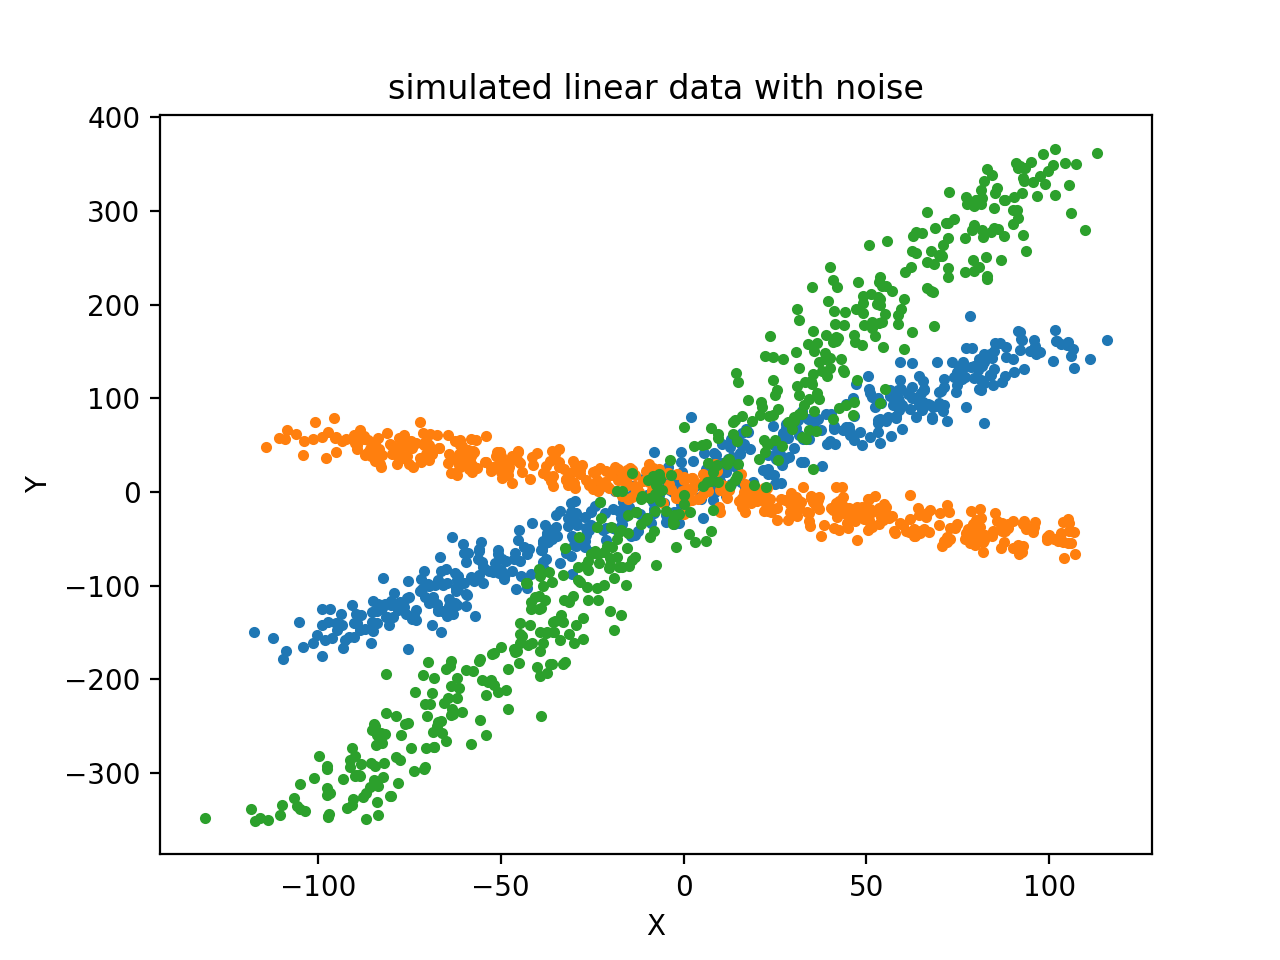

Text(0.5, 1.0, 'simulated linear data with noise')

In [32]:
%matplotlib notebook
m, n = 6, 500
data = np.array([])
for i in range(m // 2):
    XY = simulateLinearData(np.random.random() * 10 - 5, 
                            np.random.random() * 10 - 5, N=n)
    data = np.append(data, XY)
    X, Y = XY
    pl.plot(X, Y, '.')
data = np.reshape(data, (m, n))
pl.xlabel("X")
pl.ylabel("Y")
pl.title("simulated linear data with noise")

<IPython.core.display.Javascript object>


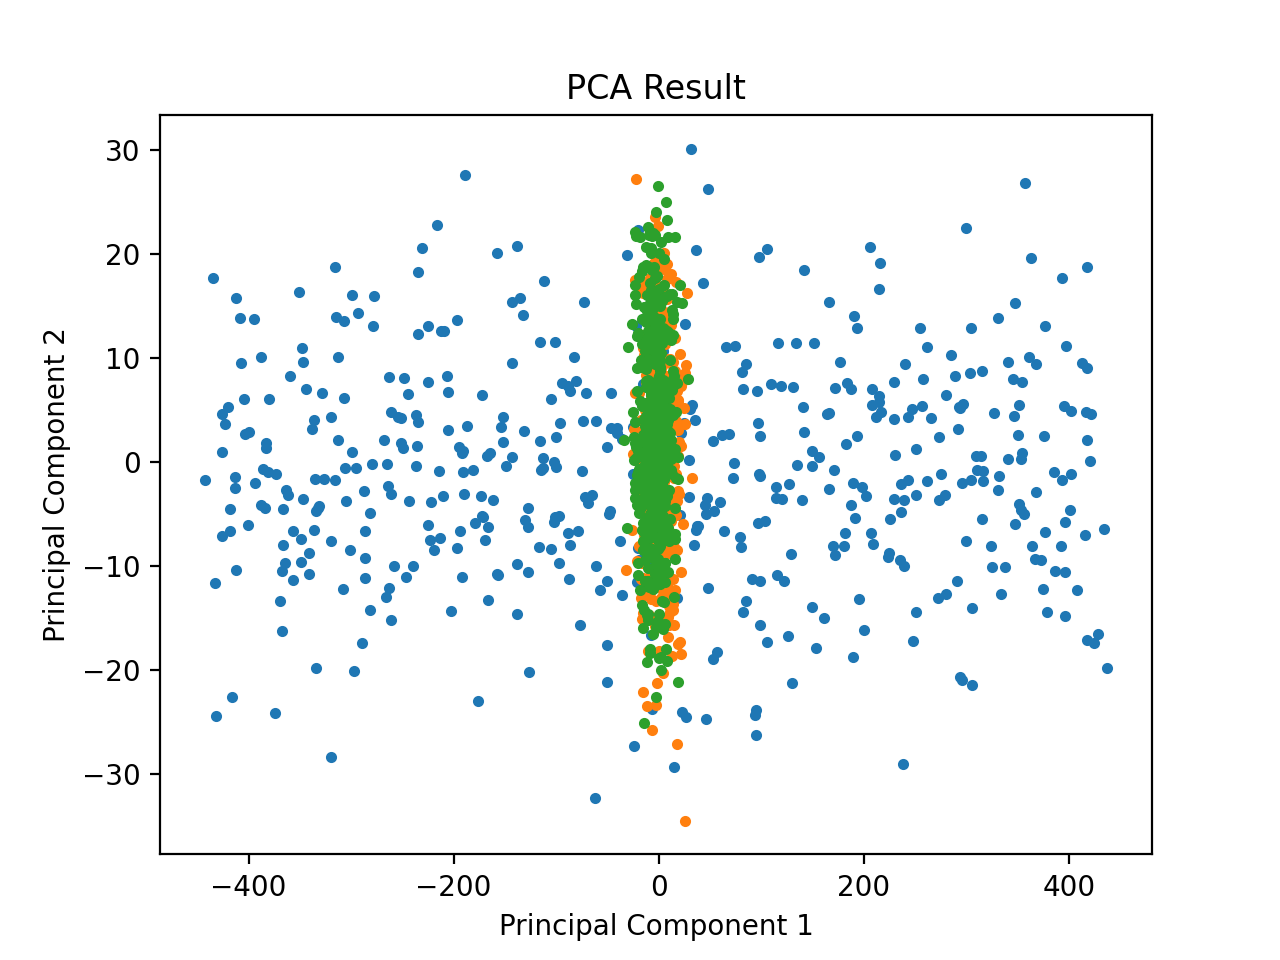

Text(0.5, 1.0, 'PCA Result')

In [35]:
%matplotlib notebook
e_val, e_vec = returnPCAvectors(data)
corr_data = np.transpose(np.matmul(np.transpose(e_vec), data))
for i in range(m // 2):
    X, Y = corr_data[:, 2*i], corr_data[:, 2*i+1]
    if np.ptp(X) > np.ptp(Y):
        pl.plot(X, Y, '.')
    else:
        pl.plot(Y, X, '.')
pl.xlabel("Principal Component 1")
pl.ylabel("Principal Component 2")
pl.title("PCA Result")

Result after PCA is consistent with the $x$-axis (upto a few $\sigma = 10$ from noise), showing that in this basis, we need only 3 variables to set all 6 (as each pair is correlated)

In [295]:
def simulateSHM(amp, freq, angle, N=500, sigNoise=2):
    t = np.linspace(-100, 100, N)
    dis = amp * np.sin(freq * t)
    X, Y = dis * np.cos(angle), dis * np.sin(angle)
    return np.array([X + np.random.normal(0, sigNoise, len(X)), 
                     Y + np.random.normal(0, sigNoise, len(Y))])

<IPython.core.display.Javascript object>


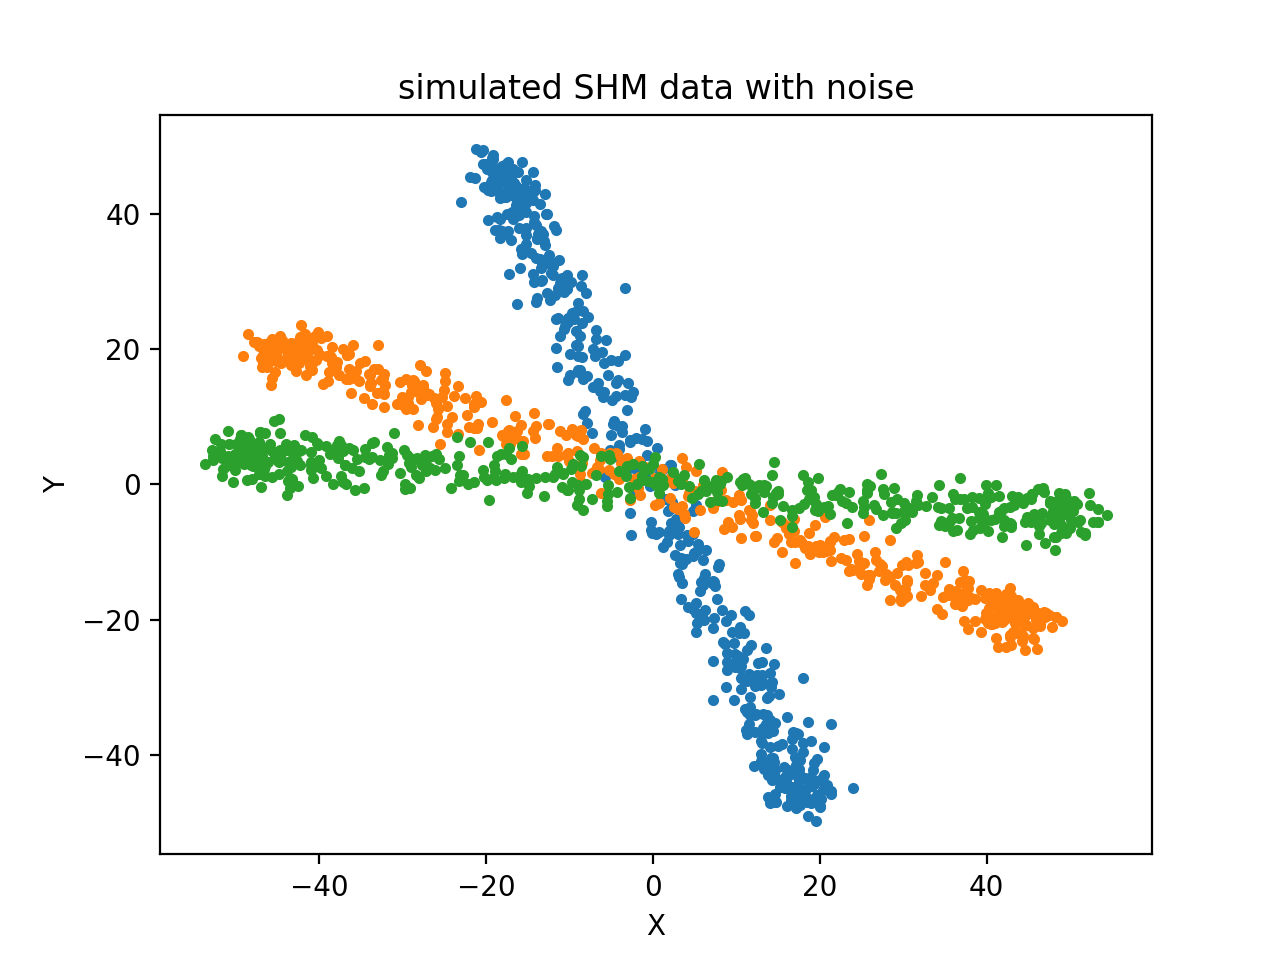

Text(0.5, 1.0, 'simulated SHM data with noise')

In [299]:
%matplotlib notebook
m, n = 6, 500
data = np.array([])
for i in range(m // 2):
    XY = simulateSHM(50, 10, np.random.random() * 12 - 6, N=n)
    data = np.append(data, XY)
    X, Y = XY
    pl.plot(X, Y, '.')
data = np.reshape(data, (m, n))
pl.xlabel("X")
pl.ylabel("Y")
pl.title("simulated SHM data with noise")

<IPython.core.display.Javascript object>


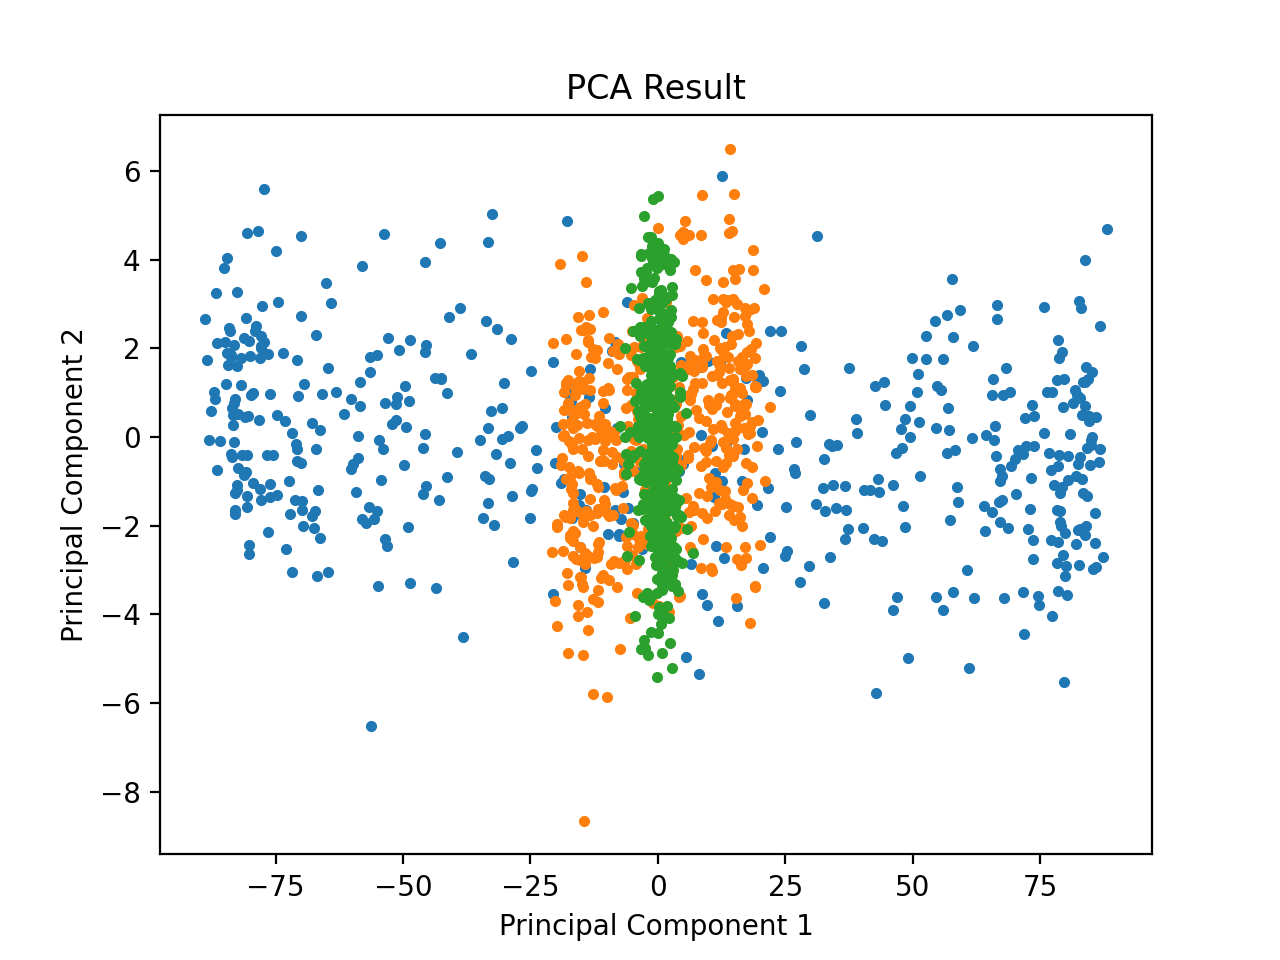

Text(0.5, 1.0, 'PCA Result')

In [300]:
%matplotlib notebook
e_val, e_vec = returnPCAvectors(data)
corr_data = np.transpose(np.matmul(np.transpose(e_vec), data))
for i in range(m // 2):
    X, Y = corr_data[:, 2*i], corr_data[:, 2*i+1]
    if np.ptp(X) > np.ptp(Y):
        pl.plot(X, Y, '.')
    else:
        pl.plot(Y, X, '.')
pl.xlabel("Principal Component 1")
pl.ylabel("Principal Component 2")
pl.title("PCA Result")

Result after PCA is consistent with the $x$-axis (upto a few $\sigma = 2$ from noise), showing that in this basis, we need only 3 variables to set all 6 (as each pair is correlated).